In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [20]:
def laplace_solver(n,target):
    nx= ny = n
    dx = 2/(nx-1)
    phi = np.zeros((nx,ny))

    def apply_bc(phi):
        x = np.linspace(0,2, nx)
        y = np.linspace(0,1,ny)
        phi[:,0] = 0
        phi[:,-1] = y
        phi[0, :] = phi[1, :]  # dp/dy = 0 @ y = 0
        phi[-1, :] = phi[-2, :]  # dp/dy = 0 @ y = 1
        return phi
    
    def update(phi):
        for i in range(1, nx-1):
            for j in range(1, ny-1):
                phi[i,j] = (phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1])/4 # Assume dx=dy so we can just divide by 4
        return phi
    
    def iterate(phi, target):
        l1_norm = 1
        while l1_norm>target:
            pn = phi.copy()
            phi = apply_bc(phi)
            phi = update(phi)
            l1_norm = (np.sum(np.abs(phi[:]) - np.abs(pn[:])) /
                np.sum(np.abs(pn[:])))
        
        return phi

    phi = iterate(phi,target=target)
    return phi

In [29]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    ax = fig.add_subplot(projection='3d')
    X, Y = np.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

C:\Users\User\AppData\Local\Temp\ipykernel_25544\813051918.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  l1_norm = (np.sum(np.abs(phi[:]) - np.abs(pn[:])) /


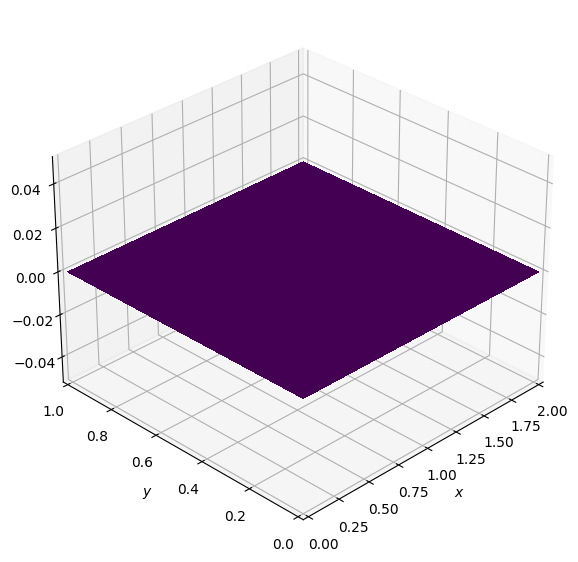

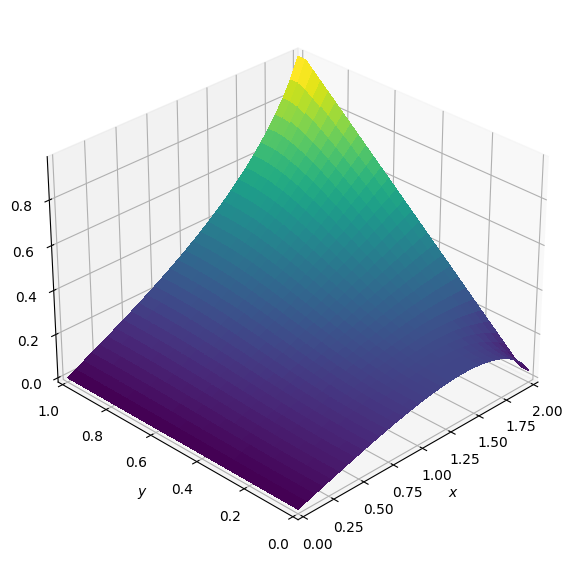

In [31]:
n = 31
phi = laplace_solver(n, 1e-4)
x = np.linspace(0, 2, n)
y = np.linspace(0, 1, n)
plot2D(x,y,np.zeros((n,n)))
plot2D(x,y,phi)